Show Best so far of each Example image

In [11]:
def read_pop(filename):
    """Read Text output"""
    print(f"Reading in {filename}")
    inlist = []
    fitness = []
    with open(filename,'r') as myfile:
        for line in myfile:
            if (len(line) > 1):
                x,fit,pop = eval(line)
                inlist.append(pop)
                fitness.append(fit)
    return inlist, fitness

In [12]:
from pathlib import Path
def getimages(folder='Image_data/Examples/'):
    #def pickimage(

    directory = Path(folder)

    allfiles = sorted(directory.glob('*'))

    filelist = []
    masklist = []
    progresslist = []
    for file in allfiles:
        if file.suffix ==".jpg" or file.suffix ==".jpeg" or file.suffix ==".JPEG" or file.suffix ==".png":
            if not "_GT" in file.name:
                filelist.append(file)
                mask = directory.glob(f"{file.stem}_GT*")
                for m in mask:
                    masklist.append(m)
                progresslist.append(Path(f"{folder}/_{file.stem}.txt"))
    return filelist, masklist, progresslist

In [13]:
directory = "./Image_data/Examples/"
[images, masks, progresslist] = getimages(directory)

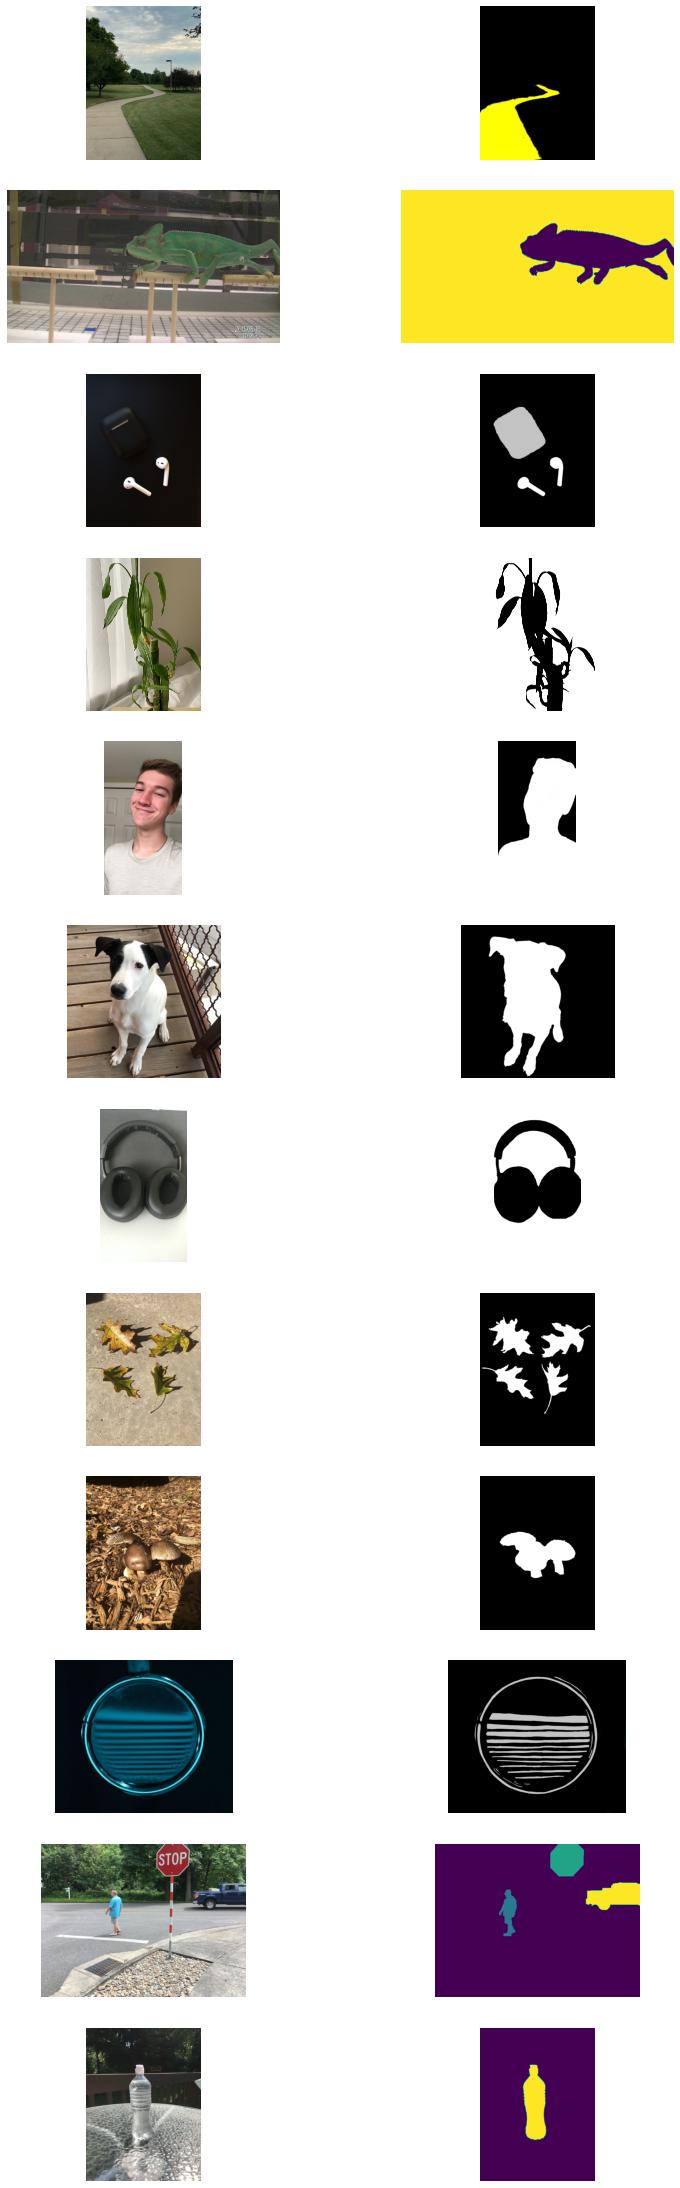

In [14]:
import numpy as np
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes 
from see.git_version import git_version
from see import GeneticSearch, Segmentors
import matplotlib.pylab as plt
import imageio

fig = plt.figure(figsize=(20, 40))

rows = len(images)

row = 0
for imfile, gtfile, bestfile in zip(images, masks, progresslist):
    mydata = base_classes.pipedata()
    mydata.img = imageio.imread(imfile)
    mydata.gmask = imageio.imread(gtfile) 
    
    my_ax = fig.add_subplot(rows, 3, 1+row*3)
    my_ax.imshow(mydata.img)
    my_ax.axis('off')
    
    my_ax = fig.add_subplot(rows, 3, 2+row*3)
    my_ax.imshow(mydata.gmask)
    my_ax.axis('off')
    
    if bestfile.exists():
        [inlist, fitness] = read_pop(bestfile)
        best = inlist[np.argmin(fitness)]

        workflow.addalgos([colorspace, segmentor, segment_fitness])
        wf = workflow(paramlist=best)

        mydata = wf.pipe(mydata)

        my_ax = fig.add_subplot(rows, 3, 3+row*3)
        my_ax.imshow(mydata.mask)
        my_ax.set_title(np.min(fitness))
        my_ax.axis('off')
    row = row+1